<a href="https://colab.research.google.com/github/revanth6921/Books-Python/blob/main/Yhills_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/h1n1_vaccine_prediction.csv")

In [3]:
df

NameError: ignored

In [4]:
df.shape

(26707, 34)

In [5]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
df.isnull()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26704,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
26705,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
12686,12686,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
12203,12203,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,2.0,0
21141,21141,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
4066,4066,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Hispanic,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,2.0,2.0,0
19424,19424,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
25411,25411,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,White,Female,NaN,NaN,NaN,Employed,"MSA, Not Principle City",1.0,0.0,1
17774,17774,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,0
2230,2230,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
23908,23908,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
5870,5870,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Principle City",1.0,1.0,0


In [8]:
df.sample().sum()

unique_id                                        13528
h1n1_worry                                         2.0
h1n1_awareness                                     1.0
antiviral_medication                               0.0
contact_avoidance                                  1.0
bought_face_mask                                   0.0
wash_hands_frequently                              1.0
avoid_large_gatherings                             0.0
reduced_outside_home_cont                          0.0
avoid_touch_face                                   1.0
dr_recc_h1n1_vacc                                  0.0
dr_recc_seasonal_vacc                              0.0
chronic_medic_condition                            0.0
cont_child_undr_6_mnths                            0.0
is_health_worker                                   0.0
has_health_insur                                   1.0
is_h1n1_vacc_effective                             4.0
is_h1n1_risky                                      2.0
sick_from_

In [9]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [11]:
df.describe().sum()

unique_id                    114534.791156
h1n1_worry                    26625.528797
h1n1_awareness                26598.880682
antiviral_medication          26637.264389
contact_avoidance             26503.171826
bought_face_mask              26689.322411
wash_hands_frequently         26670.205062
avoid_large_gatherings        26622.838250
reduced_outside_home_cont     26627.810117
avoid_touch_face              26583.144795
dr_recc_h1n1_vacc             24548.634778
dr_recc_seasonal_vacc         24549.799861
chronic_medic_condition       25738.733852
cont_child_undr_6_mnths       25888.357856
is_health_worker              25904.427189
has_health_insur              14438.205020
is_h1n1_vacc_effective        26338.858059
is_h1n1_risky                 26335.628105
sick_from_h1n1_vacc           26328.720435
is_seas_vacc_effective        26269.112551
is_seas_risky                 26211.104217
sick_from_seas_vacc           26186.451062
no_of_adults                  26464.639921
no_of_child

<Axes: xlabel='h1n1_worry', ylabel='count'>

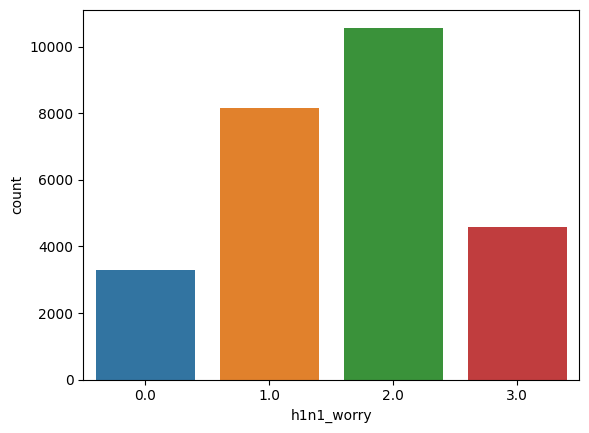

In [12]:
sns.countplot(x="h1n1_worry",data=df)

<Axes: xlabel='h1n1_worry', ylabel='count'>

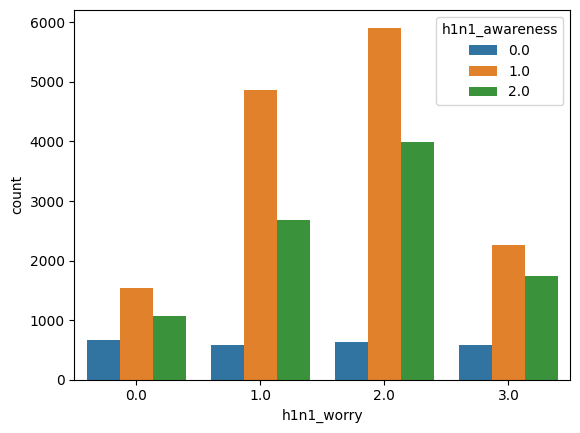

In [13]:
sns.countplot(x="h1n1_worry",hue="h1n1_awareness",data=df)

<Axes: xlabel='income_level', ylabel='count'>

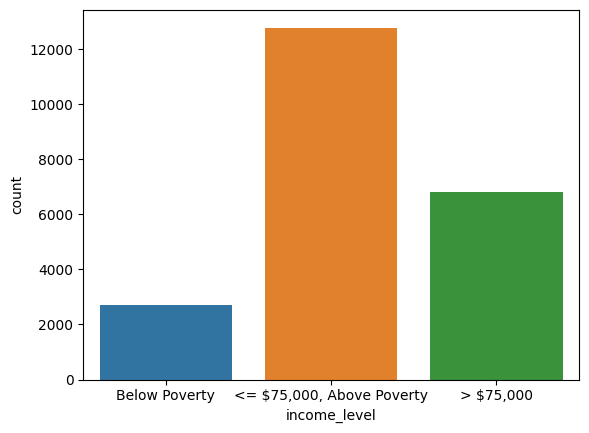

In [14]:
sns.countplot(x="income_level",data=df)

<Axes: xlabel='h1n1_worry'>

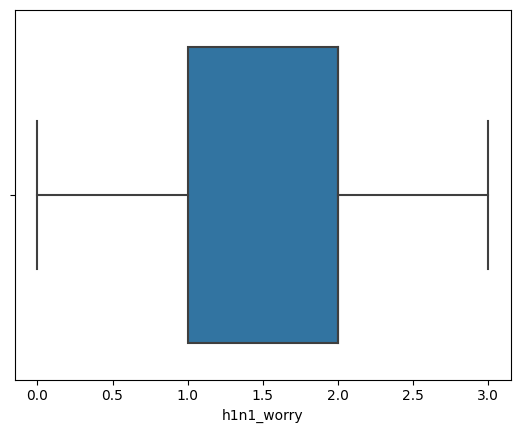

In [15]:
sns.boxplot(x="h1n1_worry",hue="h1n1_awareness",data=df)

In [16]:
X = df.drop("h1n1_vaccine", axis = 1)
y = pd.to_numeric(df["h1n1_vaccine"])

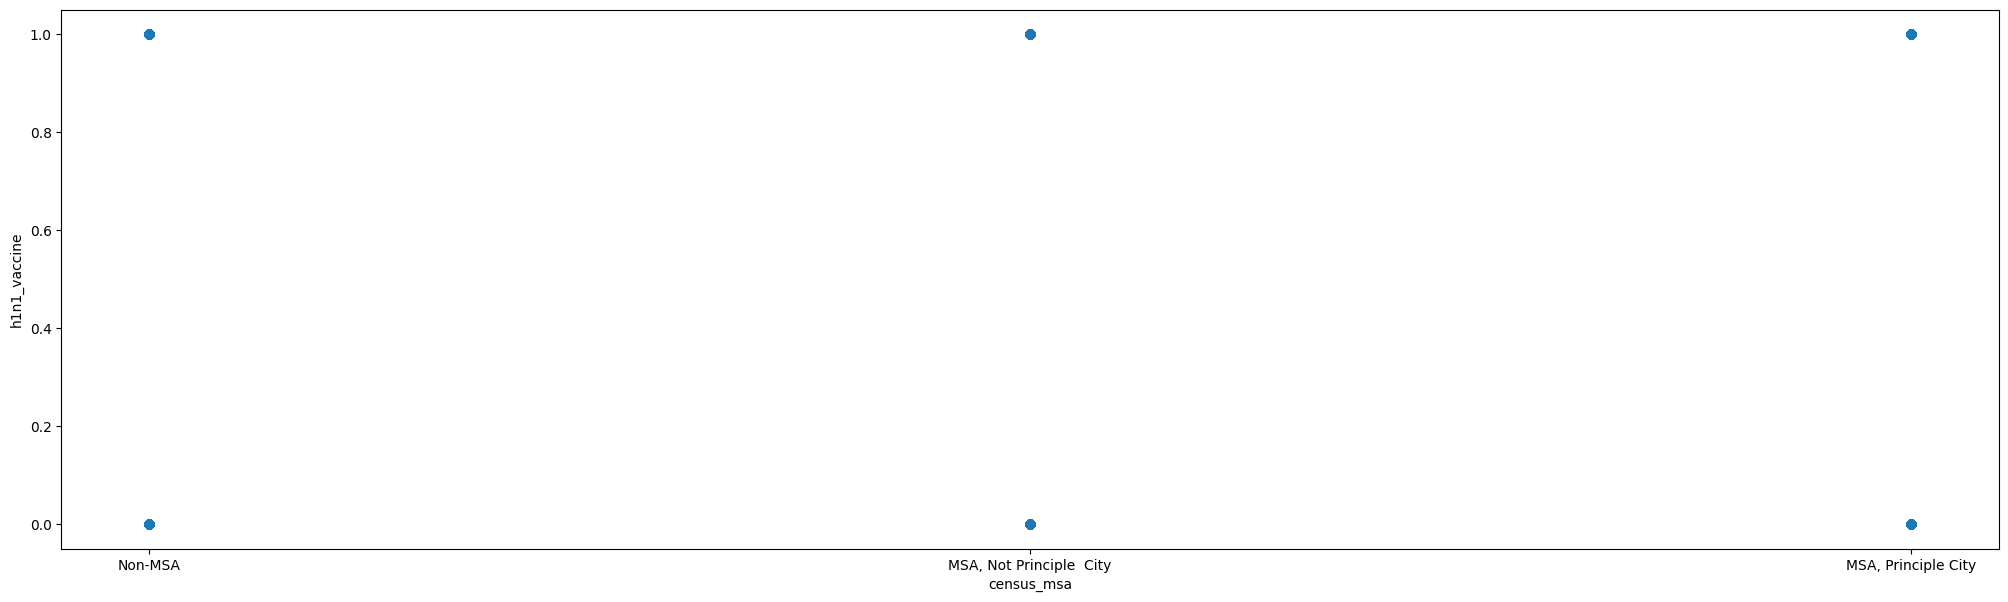

In [17]:
plt.figure(figsize = (25,7))
plt.scatter(X["census_msa"], y)
plt.xlabel('census_msa')
plt.ylabel('h1n1_vaccine')
plt.show()

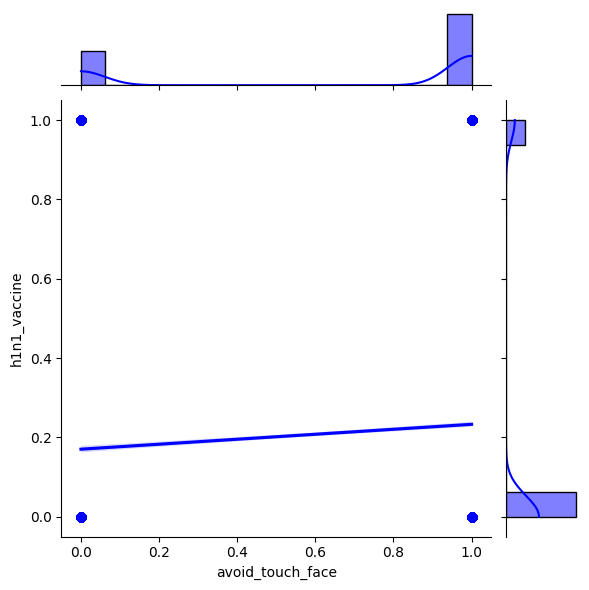

In [18]:
sns.jointplot(x=pd.to_numeric(X["avoid_touch_face"]), y = y, kind="reg",color = 'blue')

<Axes: xlabel='census_msa', ylabel='h1n1_vaccine'>

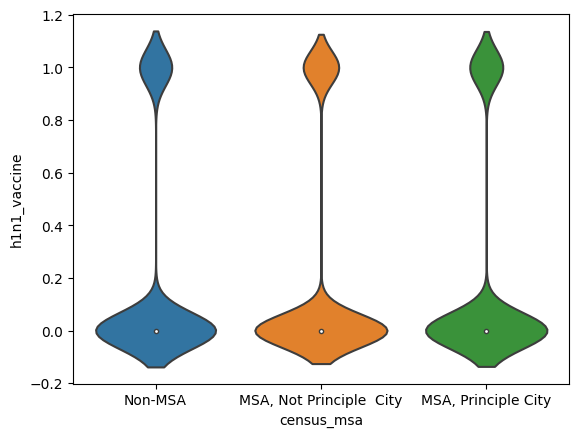

In [19]:
sns.violinplot(x=X["census_msa"],y=y)

<Axes: xlabel='no_of_adults', ylabel='h1n1_vaccine'>

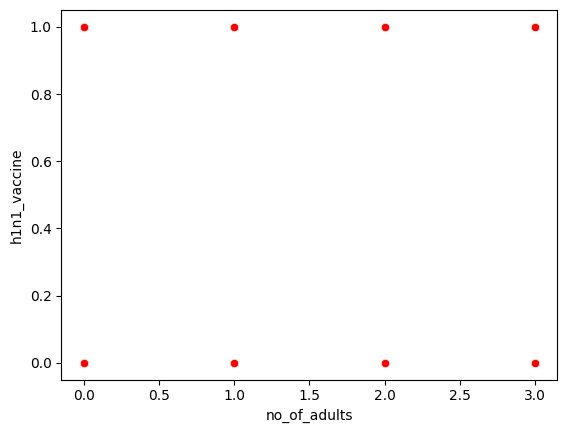

In [21]:
sns.scatterplot(x=pd.to_numeric(X["no_of_adults"]), y = y, color = "red")

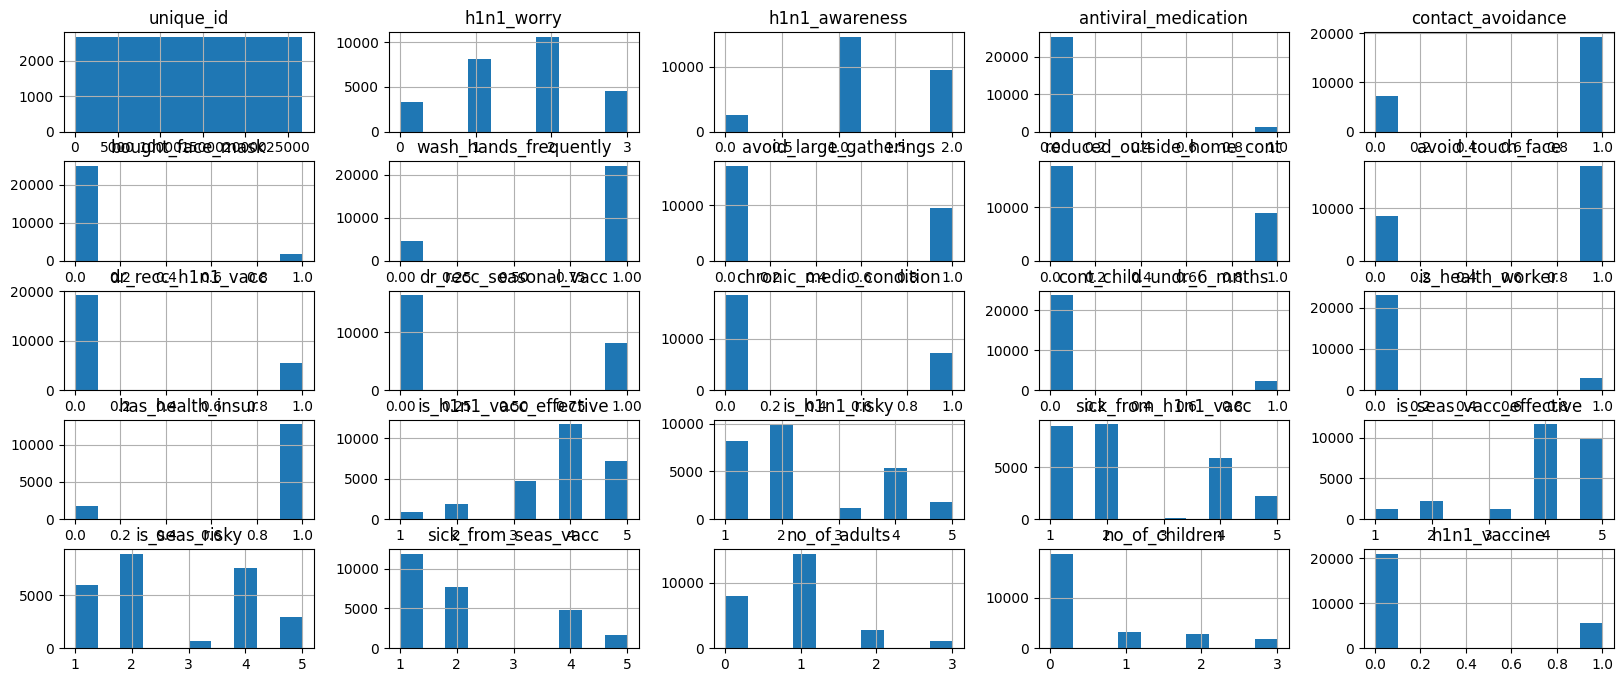

In [27]:
df.hist(figsize=(20,8))
plt.show()

In [23]:
corr=df.corr()
corr

<ipython-input-23-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648


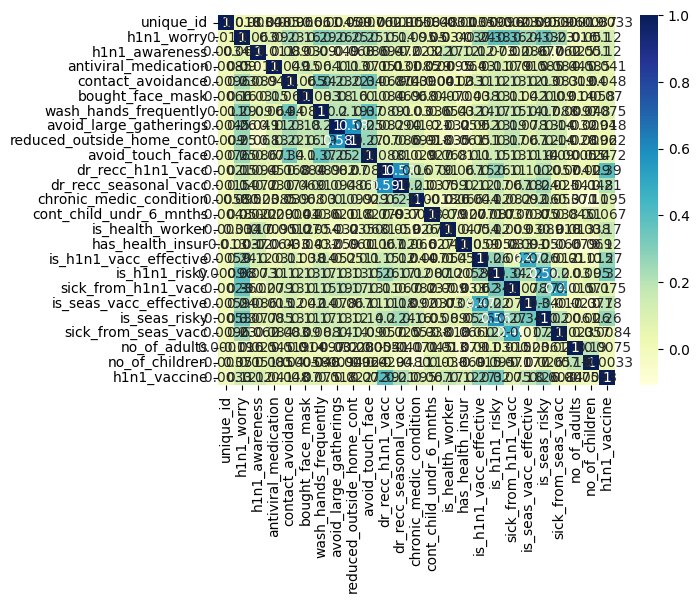

In [24]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

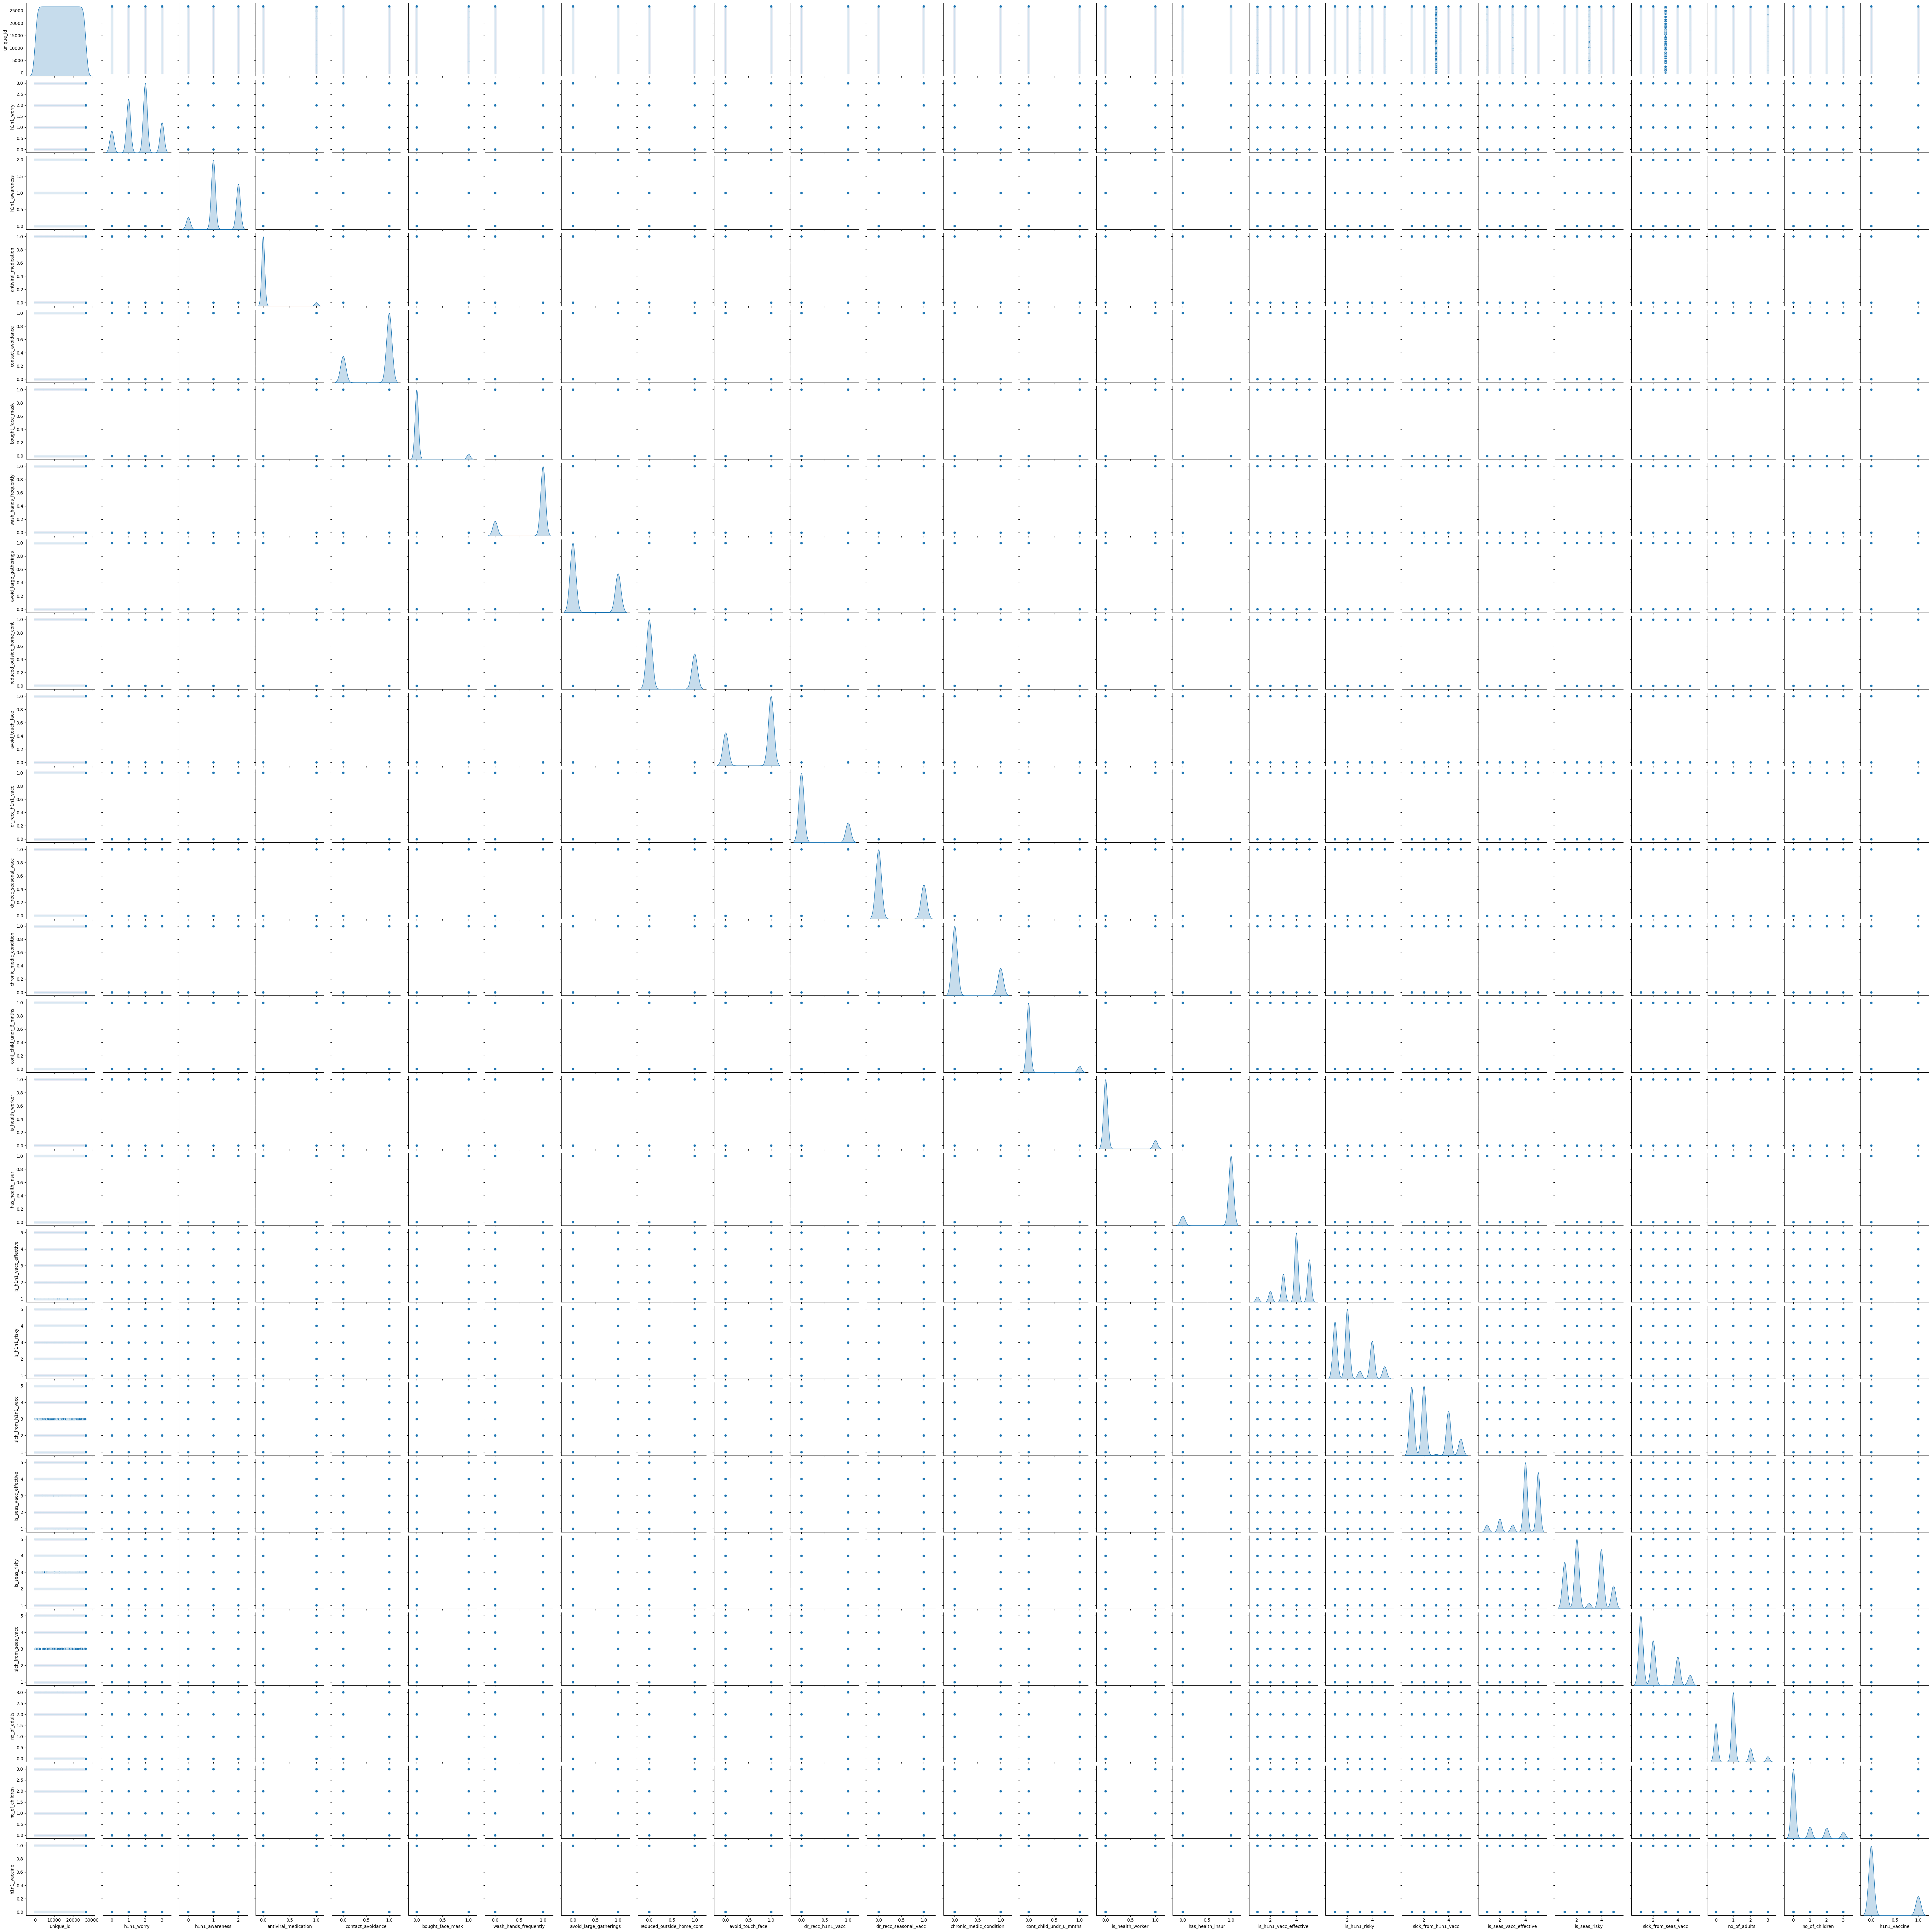

In [29]:
sns.pairplot(df,diag_kind="kde")

In [47]:
X=df.h1n1_vaccine
y=df.no_of_adults

In [48]:
print(X[:5])
print(X.shape)
print(y[:5])
print(y.shape)

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64
(26707,)
0    0.0
1    0.0
2    2.0
3    0.0
4    1.0
Name: no_of_adults, dtype: float64
(26707,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20030,)
(6677,)
(20030,)
(6677,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24036,)
(2671,)
(24036,)
(2671,)


In [55]:
## print the mean values

print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(y_train))
print(np.mean(y_test))

0.2119737061075054
0.2167727442905279
0.8855343271047659
0.8951948543321983


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size =0.1)

In [60]:
print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(y_train))
print(np.mean(y_test))

0.19850187265917604
0.21400341140741358
0.8944591029023746
0.8856122663306029


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model1=DecisionTreeClassifier()

In [84]:
model1.fit(X,y)

ValueError: ignored

In [70]:
from sklearn.ensemble import BaggingClassifier

In [71]:
model4=BaggingClassifier()

AttributeError: ignored